Global Air Pollution Analysis 

Analyze and visualize pollution levels globally using Kaggle dataset. The project focuses on identifying trends, hotspots, and potential causes of pollution.                                                                                                                         
Problem Statement:                                                                                                                        
Air pollution is a major global challenge affecting health and the environment. This project analyzes air pollution data to identify key insights about AQI values, the most polluted locations, and trends over time to guide actionable solutions.                                  
There are some terms used:                                                                                                              
AQI (Air Quality Index)                                                                                                                       
CO (Carbon Monoxide)                                               
NO2 (Nitrogen Dioxide)                                
PM2.5 (Particulate Matter 2.5):
Fine inhalable particles with diameters that are generally 2.5 micrometers or smaller.                                                       
Sources: Vehicle emissions, industrial processes, combustion activities (e.g., burning wood or coal).


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df= pd.read_excel(r"C:\Users\lenovo\Desktop\Airpollution\air pollution.xlsx")

In [17]:
print(df)

                        Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                         Italy   Priolo Gargallo         66     Moderate   
3                        Poland         Przasnysz         34         Good   
4                        France          Punaauia         22         Good   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj        184    Unhealthy   
23459                    France            Sceaux         50         Good   
23460                     India          Mormugao         50         Good   
23461  United States of America       Westerville         71     Moderate   
23462                  Malaysia            Marang         70     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \


Shape of Data

In [18]:
df.shape 

(23463, 12)

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [21]:
print("first 5 rows")

first 5 rows


In [22]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [24]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [25]:
df.dropna(inplace = True)

In [26]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

Exploratory Data Analysis

Que1.Which cities have the highest AQI values?(Top Polluted Cities)

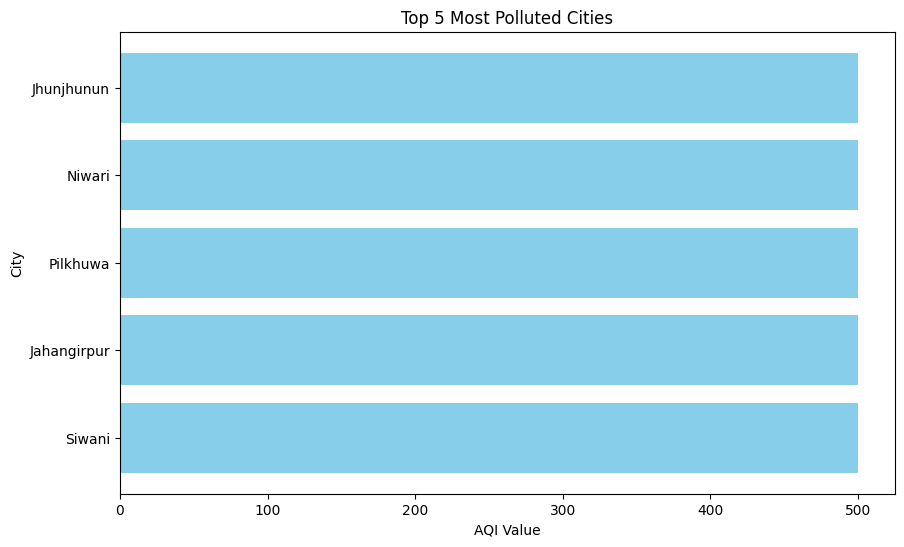

In [28]:
top_cities = df[['City', 'AQI Value']].sort_values(by='AQI Value', ascending=False).head(5)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['AQI Value'], color='skyblue')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.title('Top 5 Most Polluted Cities')
plt.show()


The cities with the highest AQI values are:                                                                                                  
Jhunjhunun  500                                                                                                   
Niwari      500                                                                                                               
Pilkhuwa    500                                                              
Jahangirpur 500                                                                               
Siwani      500                                                       

Action: Encourage clean energy and public transportation.

These cities show high AQI, so focus on reducing industrial and vehicle emissions.

Que2. Which countries are most affected by air pollution?

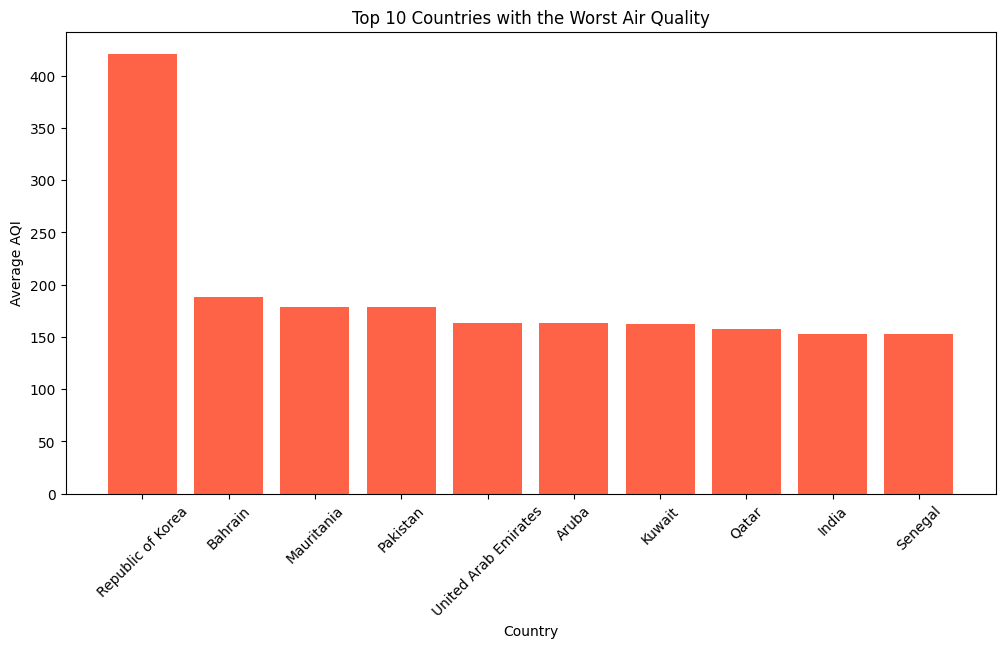

In [30]:
top_countries = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='tomato')
plt.ylabel('Average AQI')
plt.xlabel('Country')
plt.title('Top 10 Countries with the Worst Air Quality')
plt.xticks(rotation=45)
plt.show()


Que3.What is the average AQI for each country?

In [31]:
average_aqi = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)
print(average_aqi)

Country
Republic of Korea       421.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                178.788274
United Arab Emirates    163.666667
Aruba                   163.000000
Kuwait                  162.000000
Qatar                   157.500000
India                   152.964228
Senegal                 152.424242
Name: AQI Value, dtype: float64


Que4.What is the relationship between pollutants (CO, Ozone, NO2, PM2.5)?

                 CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value
CO AQI Value         1.000000         0.144838       0.487627         0.437751
Ozone AQI Value      0.144838         1.000000      -0.182934         0.340488
NO2 AQI Value        0.487627        -0.182934       1.000000         0.259084
PM2.5 AQI Value      0.437751         0.340488       0.259084         1.000000


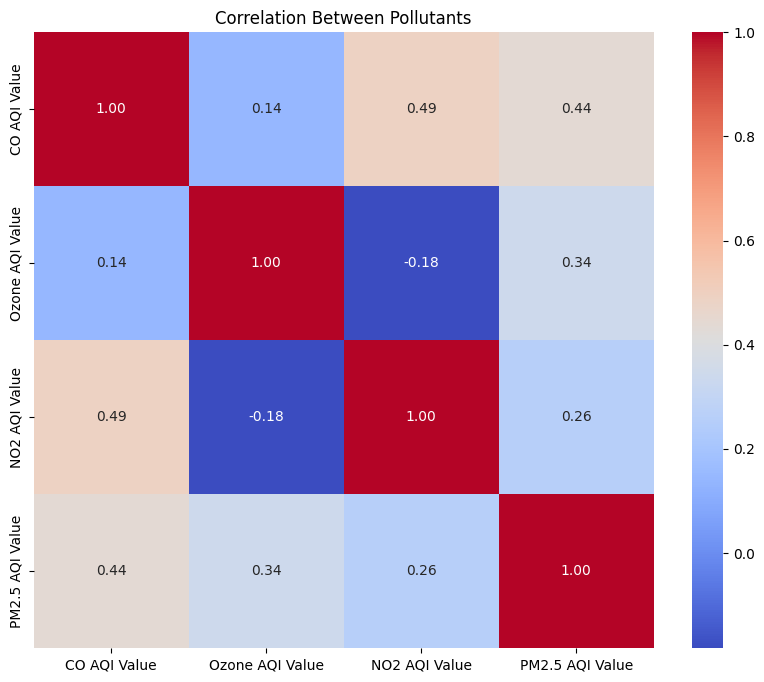

In [40]:
numeric_columns = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.show()

PM2.5 is strongly correlated with overall AQI, making it a major contributor to poor air quality.
 
Action: Focus on reducing high-impact pollutants like PM2.5 and CO.
Encourage regulations to reduce PM2.5 emissions and other correlated pollutants.                                                              
PM2.5 is strongly correlated with overall AQI, making it a major contributor to poor air quality.

Que5. Which cities have the best air quality (lowest AQI values)?

           City  AQI Value
512    El Torno          6
9194      Macas          7
23269      Tari          8
14502   Azogues          8
7486     Huaraz          9
Cities with the Best Air Quality:
           City  AQI Value
512    El Torno          6
9194      Macas          7
23269      Tari          8
14502   Azogues          8
7486     Huaraz          9


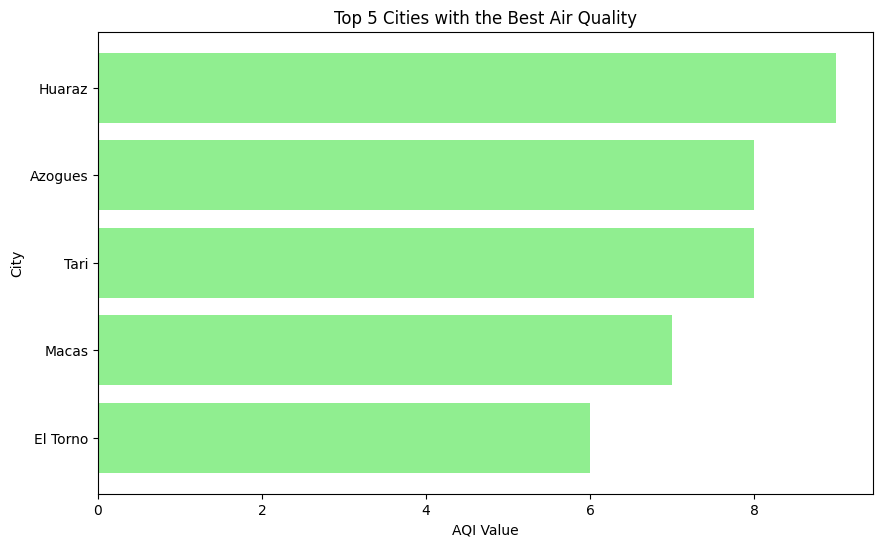

In [31]:
best_air_quality_cities = df[['City', 'AQI Value']].sort_values(by='AQI Value').head(5)
print(best_air_quality_cities)
plt.figure(figsize=(10, 6))
plt.barh(best_air_quality_cities['City'], best_air_quality_cities['AQI Value'], color='lightgreen')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.title('Top 5 Cities with the Best Air Quality')
plt.show()

Action:Focus on increasing green spaces by planting more trees in urban areas and rural areas.

Que6. Which countries have the highest PM2.5 AQI values?
The countries with the highest PM2.5 AQI values, we will identify and visualize the top countries with the most severe PM2.5 pollution.

Country
Republic of Korea       415.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                173.110749
Aruba                   163.000000
Kuwait                  162.000000
United Arab Emirates    152.666667
Senegal                 152.424242
India                   149.463023
Saudi Arabia            149.285714
Name: PM2.5 AQI Value, dtype: float64


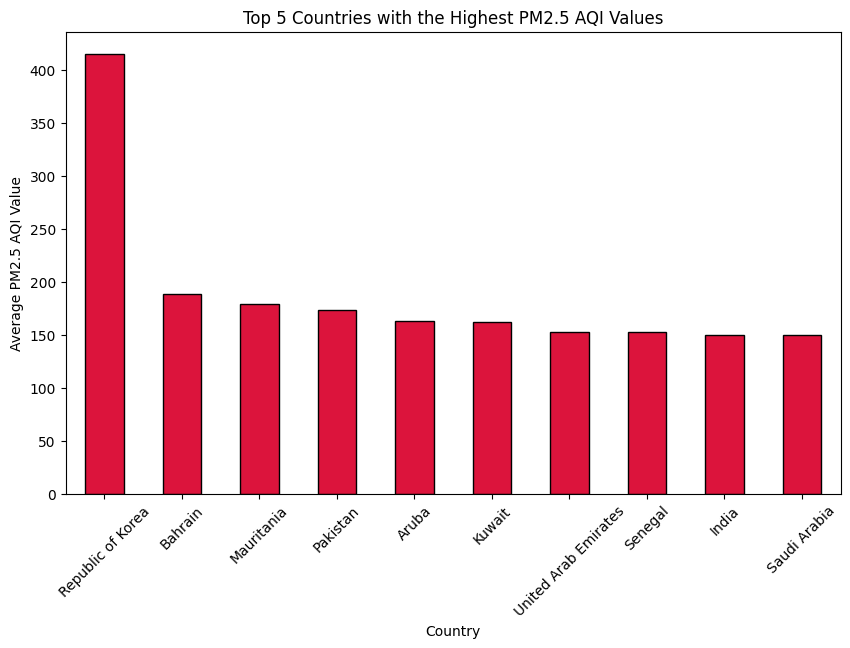

In [33]:
top_pm25_countries = df.groupby('Country')['PM2.5 AQI Value'].mean().sort_values(ascending=False).head(10)
print(top_pm25_countries)
plt.figure(figsize=(10, 6))
top_pm25_countries.plot(kind='bar', color='crimson', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Average PM2.5 AQI Value')
plt.title('Top 5 Countries with the Highest PM2.5 AQI Values')
plt.xticks(rotation=45)
plt.show()

Action: For countries with high PM2.5 levels (e.g., Republic of Korea, Bahrain), focus on controlling industrial emissions and adopting cleaner technologies.

Que 7. What percentage of cities exceed the safe AQI threshold?
How many cities have AQI values above 100 (unhealthy for sensitive groups)?

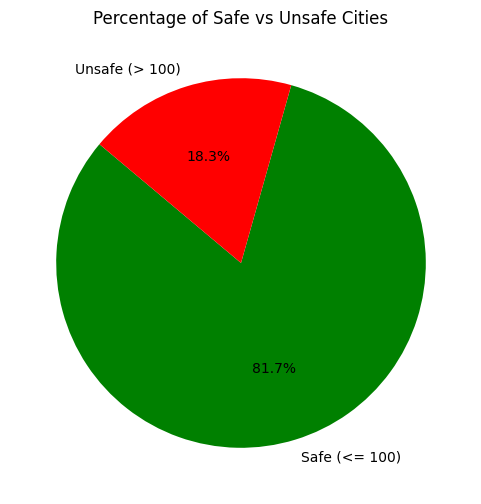

In [32]:
safe_cities = len(df[df['AQI Value'] <= 100])
unsafe_cities = len(df[df['AQI Value'] > 100])
labels = ['Safe (<= 100)', 'Unsafe (> 100)']
sizes = [safe_cities, unsafe_cities]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Percentage of Safe vs Unsafe Cities')
plt.show()


Coclusion:

Some cities have very high AQI values, indicating poor air quality.

Most cities fall under "Good" or "Moderate" AQI categories, but there are a smaller number of "Unhealthy" or "Hazardous" days.

PM2.5 is strongly correlated with overall AQI, making it a major contributor to poor air quality.

Countries with high AQI need stricter regulations to control pollution.

Countries with good AQI should focus on maintaining or improving air quality by increasing green spaces, such as planting more trees.

Reducing pollutants like PM2.5 and CO and promoting cleaner technologies will help improve air quality and public health.